<a href="https://colab.research.google.com/github/farhan1503001/Generative-Deep-Learning-With-Tensorflow/blob/main/MNIST%20Auto%20Encoder/MNIST_Auto_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Auto Encoder 


In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
  
import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.python.ops.gen_array_ops import invert_permutation_eager_fallback
def map_image(image,label):
  image=tf.cast(image,dtype=tf.float32)
  image=image/255.0
  #Now kind of flattening the image for our model
  image=tf.reshape(image,shape=(784,))
  #As in auto encoder image is itself it's label
  return image,image

**Loading the dataset**

In [3]:
from tensorflow.python.ops.gen_linalg_ops import batch_cholesky
#Now batchify and creating train and test dataset
Batch_size=128
Shuffle=1024
#Now creating training and testing dataset
train_dataset=tfds.load(name='mnist',as_supervised=True,split='train')
#Now performing image preprocessing
train_dataset=train_dataset.map(map_image)
train_dataset=train_dataset.shuffle(Shuffle).batch(Batch_size).repeat()

#Now creating testing dataset
test_dataset=tfds.load(name='mnist',as_supervised=True,split='test')
test_dataset=test_dataset.map(map_image)
test_dataset=test_dataset.shuffle(Shuffle).batch(Batch_size).repeat()

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]


Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [6]:
#Now creating autoencoder
def simple_autoencoder(inputs):
  #We will return just encoder and decoder
  encoder=tf.keras.layers.Dense(units=32,activation='relu')(inputs)
  decoder=tf.keras.layers.Dense(units=28*28,activation='sigmoid')(encoder)
  return encoder,decoder

inputs=tf.keras.layers.Input(shape=(784,))

encoder_out,decoder_out=simple_autoencoder(inputs)
encoder_model=tf.keras.Model(inputs=inputs,outputs=encoder_out)
autoencoder_model=tf.keras.Model(inputs=inputs,outputs=decoder_out)

**Compiling the model**

In [7]:
autoencoder_model.compile(
    optimizer=tf.keras.optimizers.Adam(), 
    loss='binary_crossentropy')

In [8]:
train_steps=60000//Batch_size
history = autoencoder_model.fit(train_dataset, steps_per_epoch=train_steps, epochs=50)

Epoch 1/50
468/468 [==============================] - 11s 22ms/step - loss: 0.2281
Epoch 2/50
468/468 [==============================] - 6s 12ms/step - loss: 0.1426
Epoch 3/50
468/468 [==============================] - 6s 12ms/step - loss: 0.1197
Epoch 4/50
468/468 [==============================] - 6s 12ms/step - loss: 0.1076
Epoch 5/50
468/468 [==============================] - 8s 17ms/step - loss: 0.1008
Epoch 6/50
468/468 [==============================] - 9s 19ms/step - loss: 0.0973
Epoch 7/50
468/468 [==============================] - 6s 12ms/step - loss: 0.0957
Epoch 8/50
468/468 [==============================] - 6s 13ms/step - loss: 0.0948
Epoch 9/50
468/468 [==============================] - 8s 17ms/step - loss: 0.0943
Epoch 10/50
468/468 [==============================] - 6s 12ms/step - loss: 0.0940
Epoch 11/50
468/468 [==============================] - 6s 12ms/step - loss: 0.0938
Epoch 12/50
468/468 [==============================] - 6s 12ms/step - loss: 0.0936
Epoch 13/50


**Visualization**

In [9]:
def display_one_row(disp_images, offset, shape=(28, 28)):
  '''Display sample outputs in one row.'''
  for idx, test_image in enumerate(disp_images):
    plt.subplot(3, 10, offset + idx + 1)
    plt.xticks([])
    plt.yticks([])
    test_image = np.reshape(test_image, shape)
    plt.imshow(test_image, cmap='gray')


def display_results(disp_input_images, disp_encoded, disp_predicted, enc_shape=(8,4)):
  '''Displays the input, encoded, and decoded output values.'''
  plt.figure(figsize=(15, 5))
  display_one_row(disp_input_images, 0, shape=(28,28,))
  display_one_row(disp_encoded, 10, shape=enc_shape)
  display_one_row(disp_predicted, 20, shape=(28,28,))

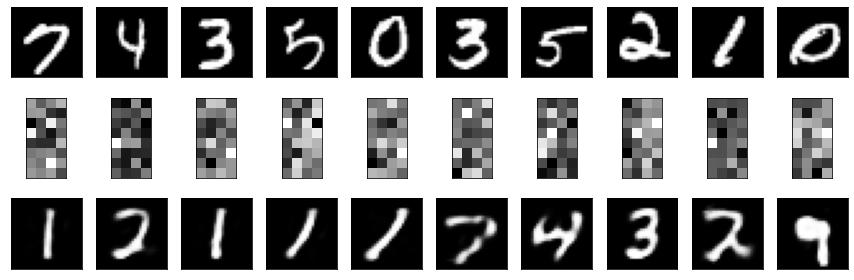

In [12]:
test_data=test_dataset.take(1)
output_samples=[]
for input_image, image in tfds.as_numpy(test_data):
      output_samples = input_image

# pick 10 random numbers to be used as indices to the list above
idxs = np.random.choice(Batch_size, size=10)

# get the encoder output
encoded_predicted = encoder_model.predict(test_data)

# get a prediction for the test batch
simple_predicted = autoencoder_model.predict(test_data)

# display the 10 samples, encodings and decoded values!
display_results(output_samples[idxs], encoded_predicted[idxs], simple_predicted[idxs])